# Data Science and Business Analytics Intern @ The Sparks Foundation 

## Author : M Sajitha 

## Domain : Computer Vision and Internet of Things 

## Task 5 : Color Identification in Images (Level - Beginner)

## Import necessary libraries 

In [1]:
#Backend of matplotlib 
%matplotlib inline

#To perform the multi-dimensional operation
import numpy as np

#To perform graphical plot into the context
import matplotlib.pyplot as plt

#To load an image from the specified file
import cv2 as cv

#To count hashable objects
from collections import Counter

#Unsupervised learning algorithm
from sklearn.cluster import KMeans

#To determine color space
from skimage.color import rgb2lab, deltaE_cie76

#Functions for interacting with the operating system.
import os

## Load the image

In [2]:
image = cv.imread('flower.jpg')

## Print type of the image 

In [3]:
print("The type of the image is ", type(image))

The type of the image is  <class 'numpy.ndarray'>


## Determine size of the image 

In [4]:
print("shape ", image.shape)

shape  (580, 1000, 3)


### The shape of the array is (580, 1000, 3). The first two values represent the pixels of the image. The third value is set to 3 because each pixel is represented as a combination of the three colors i.e., Red, Green and Blue

## Display the image

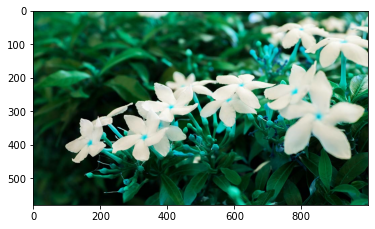

In [5]:
plt.imshow(image)

### By default, OpenCV reads the image in the sequence Blue,Green,Red (BGR). Thus, to view the actual image we need to convert the rendering to Red,Green,Blue (RGB)

## Convert image to RGB scale 

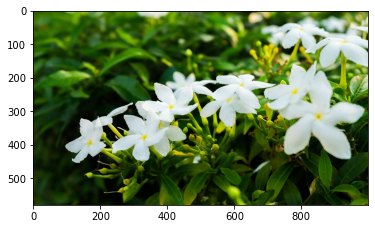

In [6]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)

### Thus the original image has been displayed

## Resize the image 

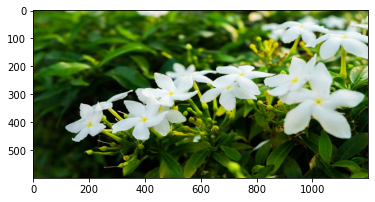

In [7]:
resized_image = cv.resize(image, (1200, 600))

plt.imshow(resized_image)

### It can be seen that the image has been resized. The first argument of the parenthesis determines the image to be resized and the second argument represents the height and width

## Extract top colours from the image

In [8]:
#To get the image
def get_image(image_path):
    image = cv.imread(image_path)
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    return image

#RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Get colours of the image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    #To Resize image to the size (1000,800)
    modified_image = cv.resize(image, (1000, 800), interpolation = cv.INTER_AREA)
    
    #To Reshape the image as KMeans expects input to be of 2 dimensions
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    #To create clusters of colours which will be the top colours 
    clf = KMeans(n_clusters = number_of_colors)
    
    #To fit and predict on the same image to extract the prediction
    lables = clf.fit_predict(modified_image)
    
    #To get count of all labels
    counts = Counter(lables)
    
    #To find the colours
    center_colors = clf.cluster_centers_
    
    #To get ordered colours by iterating over the keys present in count and divide each value by 255
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    
    #To find the hex colours 
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    
    #To find the rgb colours 
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    #Return the rgb colours 
    if (show_chart):
        plt.figure(figsize = (8, 6))
        
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        
    return rgb_colors

## Display top colours of the image 

[array([26.04054673, 54.68901036,  5.77841024]),
 array([142.80159672, 169.16557119,  94.80954824]),
 array([ 7.86632005, 20.02336067,  2.49782664]),
 array([ 89.46152754, 129.82604766,  19.64632446]),
 array([184.50541996, 200.27659277, 179.51384712]),
 array([165.84221406, 182.47289848,  15.22446792]),
 array([50.60218454, 91.39655761,  9.64007647]),
 array([213.47344001, 225.83282646, 224.7663953 ])]

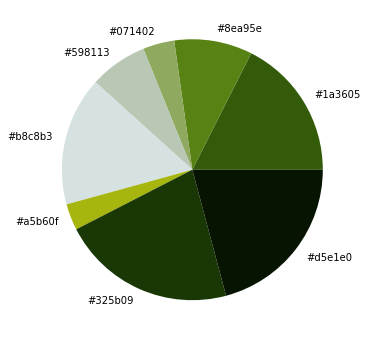

In [10]:
get_colors(get_image('flower.jpg'), 8, True)

### Thus the top 8 colours of the image has been displayed via a piechart

## Filtering images from a folder

In [11]:
# Define the path of the folder where the images are stored 
IMAGE_DIRECTORY=r'C:\Users\Ramu\Desktop\Images' 

COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0],
    'BLACK': [0, 0, 0]
}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## Loading the images from the folder

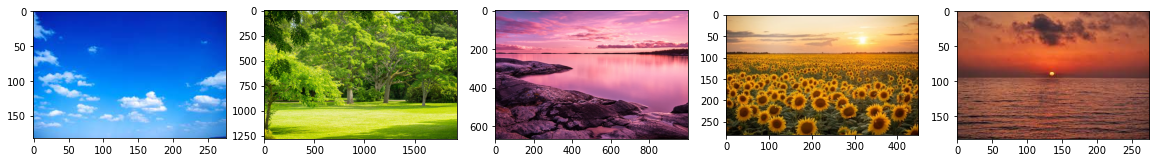

In [12]:
plt.figure(figsize=(20, 10))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    
    plt.imshow(images[i])

## Matching images with colour 

In [13]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    image_colors = get_colors(image, number_of_colors, False)
    
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

## Show selected images

In [14]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        
        if (selected):
            plt.subplot(1, 5, index)
            
            plt.imshow(images[i])
            
            index += 1

## Identifying green colour 

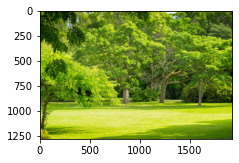

In [15]:
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['GREEN'], 60, 5)

## Identifying blue colour 

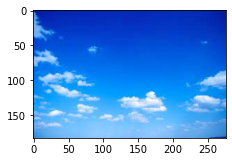

In [16]:
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['BLUE'], 60, 5)

## Conclusion 

### Thus a color detector which identifies all the colors in an image has been implemented 

# Thank you 